<a href="https://colab.research.google.com/github/ssshanaka/PyTorch-101-Crash-Course-For-Beginners---Workflow/blob/main/PyTorch_101_Crash_Course_For_Beginners_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import torch
from torch import nn # for nueral netwroks
import matplotlib.pyplot as plt

## Data preparing and Loading

In [20]:
# create known parameters
weight = 0.7
bias = 0.3

# create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [21]:
len(X), len(y)

(50, 50)

## Spliting datat for training and testing

In [22]:
# create a train/test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [23]:
# visualize data

def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):

    plt.figure(figsize=(10, 7))

    # plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    # if there are predictions plot them in red
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # show the legend
    plt.legend(prop={'size':14});

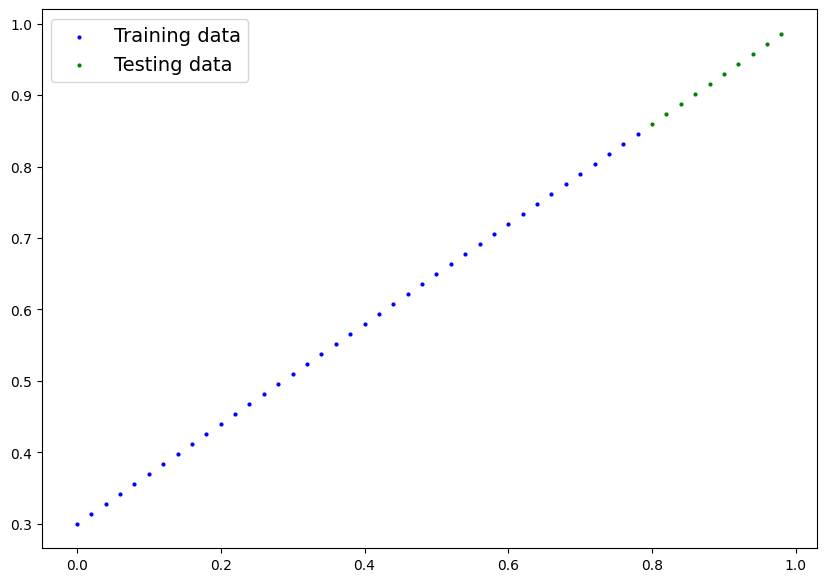

In [24]:
plot_predictions();

## Build Model

In [25]:
# Create linear regression model class

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))

    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # "x" is the input data
    return self.weights * x + self.bias # linear formula

In [26]:
# create a random seed

torch.manual_seed(42)

# create an instance of the model
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [27]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [28]:
# making predictions

with torch.inference_mode(): # or torch.no_grad() - turns off gradient tracking for higher speed in predicting
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

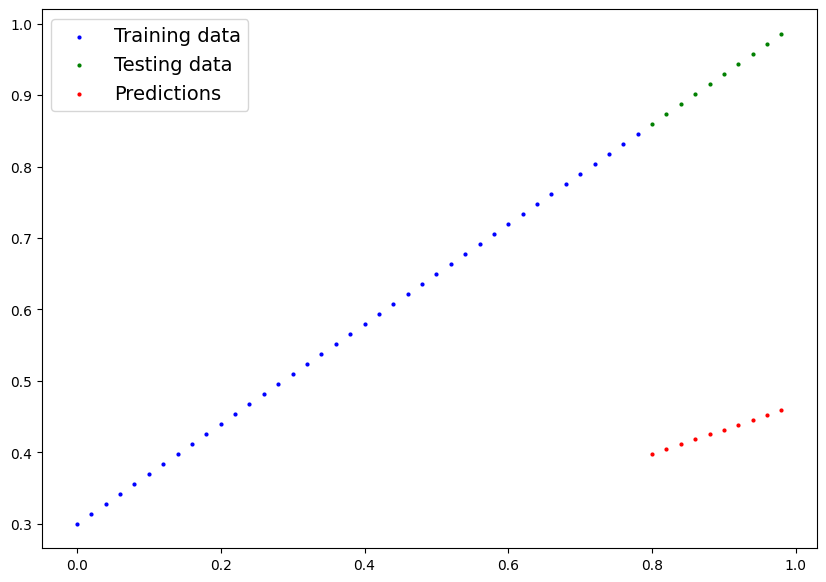

In [29]:
plot_predictions(predictions = y_preds)

## Train Model

In [30]:
# setup a loss function - measures how wrong the model is
loss_fn = nn.L1Loss()

# setup an optimizer - adjusts parameters to reduce the loss
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # learning rate

### Building a training loop and a TEsting loop

In [33]:
# an epoch is one loop through data
epochs = 100

# 0. Loop through the data
for epoch in range(epochs):
  model_0.train()  # train model in PyTorch sets all parametersthat require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the Loss
  loss = loss_fn(y_train, y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward - perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step()

  # Testing
  model_0.eval() # turns off different settings in the model not needed for testing/evaluation (dropout/batchnorm)
  with torch.inference_mode(): # turn off gradient tracking
    # 1. forward pass
    test_pred = model_0(X_test)

    # 2. calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # print out what's happening
  if epoch % 10 == 0:
    print(f"Ephoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

    # Print out model state dict
    print(f"Model state dict: {model_0.state_dict()}")
    print(f"ephocs: {epoch} , Loss: {loss}")

Ephoch: 0 | Loss: 0.28983935713768005 | Test Loss: 0.4541231691837311
Model state dict: OrderedDict({'weights': tensor([0.3484]), 'bias': tensor([0.1588])})
ephocs: 0 , Loss: 0.28983935713768005
Ephoch: 10 | Loss: 0.1746293306350708 | Test Loss: 0.3194132149219513
Model state dict: OrderedDict({'weights': tensor([0.3874]), 'bias': tensor([0.2588])})
ephocs: 10 , Loss: 0.1746293306350708
Ephoch: 20 | Loss: 0.07638873159885406 | Test Loss: 0.19773726165294647
Model state dict: OrderedDict({'weights': tensor([0.4258]), 'bias': tensor([0.3463])})
ephocs: 20 , Loss: 0.07638873159885406
Ephoch: 30 | Loss: 0.05069301277399063 | Test Loss: 0.13647659122943878
Model state dict: OrderedDict({'weights': tensor([0.4564]), 'bias': tensor([0.3803])})
ephocs: 30 , Loss: 0.05069301277399063
Ephoch: 40 | Loss: 0.04463795945048332 | Test Loss: 0.1100495308637619
Model state dict: OrderedDict({'weights': tensor([0.4788]), 'bias': tensor([0.3868])})
ephocs: 40 , Loss: 0.04463795945048332
Ephoch: 50 | Loss

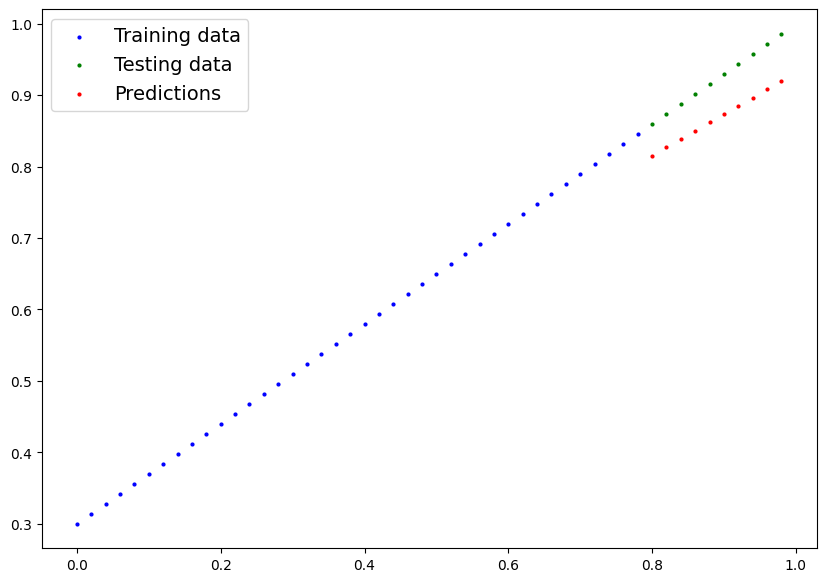

In [34]:
#

with torch.inference_mode():
  y_preds = model_0(X_test)

plot_predictions(predictions=y_preds)